In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import skimage.io as sio
import matplotlib.pyplot as plt
from skimage.morphology import square, opening, closing
from skimage.measure import regionprops, label
import diff_register.im_process as imp
%matplotlib inline

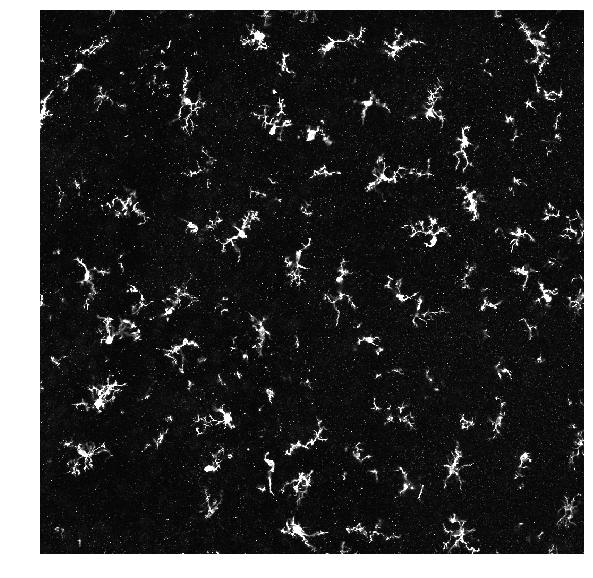

In [2]:
original_im = sio.imread('mglia_small.tif')
original_im = original_im[:, :, 1]
original_im = (255.0 / original_im.max() * (original_im - original_im.min())).astype(np.uint8)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(original_im, cmap='gray')
ax.axis('off')
sio.imsave('mglia_small.png', original_im)

In [ ]:
original_im

In [ ]:
#rf_image = imp.fuzzy_contrast('mglia_small.tif')
rf_image = sio.imread('fuzzy_mglia_small.png')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(rf_image, cmap='gray')
ax.axis('off')

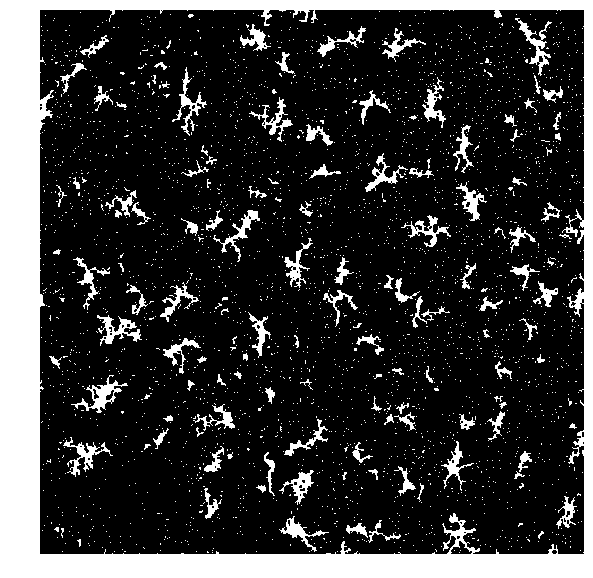

In [3]:
op_image = imp.binary_image('mglia_small.png', threshold=50, close=True)

In [10]:
op_image = op_image.astype('uint8')*255
sio.imsave('clean_mglia_small.png', op_image)

In [11]:
op_image

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ..., 
       [  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
short_image, props = imp.label_image('clean_mglia_small.png')

In [ ]:
soma = closing(short_image, square(6))
soma = opening(soma, square(13))
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(soma, cmap='gray')
ax.axis('off')

In [ ]:
sio.imsave('mglia_soma.png', soma)

In [ ]:
props = regionprops(labels)

In [ ]:
short_image = np.zeros(labels.shape)
counter = 0
skip = 0
short_props = []
for i in range(0, len(props)):
    area = props[i]['area']
    if area < 50:
        skip = skip + 1
    else:
        short_props.append(props[i])
        test_coords = props[i]['coords'].tolist()
        for coord in test_coords:
            short_image[coord[0], coord[1]] = True
        counter = counter + 1

In [ ]:
len(short_props)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(short_image, cmap='gray')
ax.axis('off')

In [ ]:
short_image[]

In [ ]:
props[0]['coords'].tolist()[0]